# Random Forrest on predictions

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## Load Predictions


In [2]:
train_path = "/Users/eg/Desktop/DC/Coins/onlyTrainPred/"
test_path = "/Users/eg/Desktop/DC/Coins/onlyTestPredictions/"

# Predictions (train set)
# The predictions on the validation set will be stacked together to create one train set for the Meta-Model.
pred_train_resNet50_both = np.load(train_path + 'ResNet50V2_train_Both_.npy')
pred_train_resNet50_obv = np.load(train_path + 'ResNet50V2_train_Obv_.npy')
pred_train_resNet50_rev = np.load(train_path + 'ResNet50V2_train_Rev_.npy')
pred_train_resNet101_both = np.load(train_path + 'ResNet101V2_train_Both_.npy')
pred_train_resNet101_obv = np.load(train_path + 'ResNet101V2_train_Obv_.npy')
pred_train_resNet101_rev = np.load(train_path + 'ResNet101V2_train_Rev_.npy')
pred_train_vgg16_both = np.load(train_path + 'VGG16_train_Both_.npy')
pred_train_vgg16_obv = np.load(train_path + 'VGG16_train_Obv_.npy')
pred_train_vgg16_rev = np.load(train_path + 'VGG16_train_Rev_.npy')

# Predictions (test set)
# The predictions on the test set will be stacked together to create the test set for the Meta-Model.
pred_test_resNet50_both = np.load(test_path + 'ResNet50V2_test_Both_.npy')
pred_test_resNet50_obv = np.load(test_path + 'ResNet50V2_test_Obv_.npy')
pred_test_resNet50_rev = np.load(test_path + 'ResNet50V2_test_Rev_.npy')
pred_test_resNet101_both = np.load(test_path + 'ResNet101V2_test_Both_.npy')
pred_test_resNet101_obv = np.load(test_path + 'ResNet101V2_test_Obv_.npy')
pred_test_resNet101_rev = np.load(test_path + 'ResNet101V2_test_Rev_.npy')
pred_test_vgg16_both = np.load(test_path + 'VGG16_test_Both_.npy')
pred_test_vgg16_obv = np.load(test_path + 'VGG16_test_Obv_.npy')
pred_test_vgg16_rev = np.load(test_path + 'VGG16_test_Rev_.npy')

dict_mints = {0: 'Abdera', 1: 'Abydos', 2: 'Adramyttion', 3: 'Aigospotamoi', 4: 'Ainos', 5: 'Alexandria Troas', 6: 'Alopekonnesos', 7: 'Anchialos', 8: 'Antandros', 9: 'Antiocheia Troas', 10: 'Apollonia Pontica', 11: 'Apollonia ad Rhyndacum', 12: 'Assos', 13: 'Atarneus', 14: 'Attaea', 15: 'Augusta Traiana', 16: 'Birytis', 17: 'Bisanthe', 18: 'Bizye', 19: 'Byzantion', 20: 'Chersonesus Thracica', 21: 'Dardanos', 22: 'Deultum', 23: 'Dikaia', 24: 'Dionysopolis', 25: 'Elaious', 26: 'Gambrion', 27: 'Gargara', 28: 'Gentinos', 29: 'Gergis', 30: 'Germe', 31: 'Hadrianeia', 32: 'Hadrianoi', 33: 'Hadrianopolis', 34: 'Hadrianotherai', 35: 'Hamaxitos', 36: 'Hephaistia', 37: 'Ilion', 38: 'Imbros', 39: 'Iolla', 40: 'Istros', 41: 'Kabyle', 42: 'Kallatis', 43: 'Kardia', 44: 'Kebren', 45: 'Kisthene', 46: 'Koila', 47: 'Kolonai', 48: 'Kypsela', 49: 'Kyzikos', 50: 'Lamponeia', 51: 'Lampsakos', 52: 'Lysimacheia', 53: 'Madytos', 54: 'Markianopolis', 55: 'Maroneia', 56: 'Mesembria', 57: 'Miletoupolis', 58: 'Myrina', 59: 'Neandreia', 60: 'Nikopolis ad Istrum', 61: 'Nikopolis ad Mestum', 62: 'Odessos', 63: 'Ophryneion', 64: 'Orthagoria', 65: 'Parion', 66: 'Pautalia', 67: 'Pergamon', 68: 'Perinthos', 69: 'Perperene', 70: 'Philippopolis', 71: 'Pionia', 72: 'Pitane', 73: 'Plakia', 74: 'Plotinopolis', 75: 'Poimanenon', 76: 'Priapos', 77: 'Prokonnesos', 78: 'Samothrake', 79: 'Selymbria', 80: 'Serdika', 81: 'Sestos', 82: 'Sigeion', 83: 'Skamandria', 84: 'Skepsis', 85: 'Tenedos', 86: 'Thasos', 87: 'Tomis', 88: 'Topeiros', 89: 'Traianopolis', 90: 'Unknown', 91: 'Zeleia'}

In [3]:
# Just for me!
print("Predictions (train set):")
print("pred_train_resNet50_both:", pred_train_resNet50_both.shape, pred_train_resNet50_both.size)
print("pred_train_resNet50_obv:", pred_train_resNet50_obv.shape, pred_train_resNet50_obv.size)
print("pred_train_resNet50_rev:", pred_train_resNet50_rev.shape, pred_train_resNet50_rev.size)
print("pred_train_resNet101_both:", pred_train_resNet101_both.shape, pred_train_resNet101_both.size)
print("pred_train_resNet101_obv:", pred_train_resNet101_obv.shape, pred_train_resNet101_obv.size)
print("pred_train_resNet101_rev:", pred_train_resNet101_rev.shape, pred_train_resNet101_rev.size)
print("pred_train_vgg16_both:", pred_train_vgg16_both.shape, pred_train_vgg16_both.size)
print("pred_train_vgg16_obv:", pred_train_vgg16_obv.shape, pred_train_vgg16_obv.size)
print("pred_train_vgg16_rev:", pred_train_vgg16_rev.shape, pred_train_vgg16_rev.size)

print("Predictions (test set):")
print("pred_test_resNet50_both:", pred_test_resNet50_both.shape, pred_test_resNet50_both.size)
print("pred_test_resNet50_obv:", pred_test_resNet50_obv.shape, pred_test_resNet50_obv.size)
print("pred_test_resNet50_rev:", pred_test_resNet50_obv.shape, pred_test_resNet50_obv.size)
print("pred_test_resNet101_both:", pred_test_resNet101_both.shape, pred_test_resNet101_both.size)
print("pred_test_resNet101_obv:", pred_test_resNet101_obv.shape, pred_test_resNet101_obv.size)
print("pred_test_resNet101_rev:", pred_test_resNet101_rev.shape, pred_test_resNet101_rev.size)
print("pred_test_vgg16_both:", pred_test_vgg16_both.shape, pred_test_vgg16_both.size)
print("pred_test_vgg16_obv:", pred_test_vgg16_obv.shape, pred_test_vgg16_obv.size)
print("pred_test_vgg16_rev:", pred_test_vgg16_rev.shape, pred_test_vgg16_rev.size)

Predictions (train set):
pred_train_resNet50_both: (17812, 2, 92) 3277408
pred_train_resNet50_obv: (17812, 2, 92) 3277408
pred_train_resNet50_rev: (17812, 2, 92) 3277408
pred_train_resNet101_both: (17812, 2, 92) 3277408
pred_train_resNet101_obv: (17812, 2, 92) 3277408
pred_train_resNet101_rev: (17812, 2, 92) 3277408
pred_train_vgg16_both: (17812, 2, 92) 3277408
pred_train_vgg16_obv: (17812, 2, 92) 3277408
pred_train_vgg16_rev: (17812, 2, 92) 3277408
Predictions (test set):
pred_test_resNet50_both: (11856, 2, 92) 2181504
pred_test_resNet50_obv: (11856, 2, 92) 2181504
pred_test_resNet50_rev: (11856, 2, 92) 2181504
pred_test_resNet101_both: (11856, 2, 92) 2181504
pred_test_resNet101_obv: (11856, 2, 92) 2181504
pred_test_resNet101_rev: (11856, 2, 92) 2181504
pred_test_vgg16_both: (11856, 2, 92) 2181504
pred_test_vgg16_obv: (11856, 2, 92) 2181504
pred_test_vgg16_rev: (11856, 2, 92) 2181504


## Actual labels for the used sets

In [4]:
train_labels = []
train_labels_names = []
for i in range(len(pred_train_resNet50_both)):
    train_labels.append(pred_train_resNet50_both[i][1]) 
    # Bei den prediction Daten entspricht das zweite Array dem richtigen Label, daher ist das für jedes Netz für das entsprechende Bild gleich. 
    # Also ist es egal, welches Netzt man an dieser Stelle nimmt.
    train_labels_names.append(dict_mints[list(pred_train_resNet50_both[i][1]).index(1)])

train_labels = np.array(train_labels)
train_labels_names = np.array(train_labels_names)
    
test_labels = []
test_labels_names = []
for i in range(len(pred_test_resNet50_both)):
    test_labels.append(pred_test_resNet50_both[i][1])
    # Bei den prediction Daten entspricht das zweite Array dem richtigen Label, daher ist das für jedes Netz für das entsprechende Bild gleich. 
    # Also ist es egal, welches Netzt man an dieser Stelle nimmt.
    test_labels_names.append(dict_mints[list(pred_test_resNet50_both[i][1]).index(1)])
    
test_labels = np.array(test_labels)
test_labels_names = np.array(test_labels_names)

In [5]:
print("Train labels: ", len(train_labels), type(train_labels), "\n Train class names: ", len(train_labels_names), type(train_labels_names))

Train labels:  17812 <class 'numpy.ndarray'> 
 Train class names:  17812 <class 'numpy.ndarray'>


In [6]:
print("Test labels: ", len(test_labels), type(test_labels), "\n Test class names: ", len(test_labels_names), type(test_labels_names))

Test labels:  11856 <class 'numpy.ndarray'> 
 Test class names:  11856 <class 'numpy.ndarray'>


## Create trainset and testset for Meta-Model

In [7]:
# Saving only predictions for the train set
x_pred_train_resNet50_both = []
x_pred_train_resNet50_obv = []
x_pred_train_resNet50_rev = []
x_pred_train_resNet101_both = [] 
x_pred_train_resNet101_obv = [] 
x_pred_train_resNet101_rev = [] 
x_pred_train_vgg16_both = []
x_pred_train_vgg16_obv = []
x_pred_train_vgg16_rev = []

for i in range(len(train_labels)):
    x_pred_train_resNet50_both.append(pred_train_resNet50_both[i][0])
    x_pred_train_resNet50_obv.append(pred_train_resNet50_obv[i][0])
    x_pred_train_resNet50_rev.append(pred_train_resNet50_rev[i][0])
    x_pred_train_resNet101_both.append(pred_train_resNet101_both[i][0])
    x_pred_train_resNet101_obv.append(pred_train_resNet101_obv[i][0])
    x_pred_train_resNet101_rev.append(pred_train_resNet101_rev[i][0])
    x_pred_train_vgg16_both.append(pred_train_vgg16_both[i][0])
    x_pred_train_vgg16_obv.append(pred_train_vgg16_obv[i][0])
    x_pred_train_vgg16_rev.append(pred_train_vgg16_rev[i][0])
    
# Saving only predictions for the test set
x_pred_test_resNet50_both = []
x_pred_test_resNet50_obv = []
x_pred_test_resNet50_rev = []
x_pred_test_resNet101_both = [] 
x_pred_test_resNet101_obv = [] 
x_pred_test_resNet101_rev = [] 
x_pred_test_vgg16_both = []
x_pred_test_vgg16_obv = []
x_pred_test_vgg16_rev = []

for i in range(len(test_labels)):
    x_pred_test_resNet50_both.append(pred_test_resNet50_both[i][0])
    x_pred_test_resNet50_obv.append(pred_test_resNet50_obv[i][0])
    x_pred_test_resNet50_rev.append(pred_test_resNet50_rev[i][0])
    x_pred_test_resNet101_both.append(pred_test_resNet101_both[i][0])
    x_pred_test_resNet101_obv.append(pred_test_resNet101_obv[i][0])
    x_pred_test_resNet101_rev.append(pred_test_resNet101_rev[i][0])
    x_pred_test_vgg16_both.append(pred_test_vgg16_both[i][0])
    x_pred_test_vgg16_obv.append(pred_test_vgg16_obv[i][0])
    x_pred_test_vgg16_rev.append(pred_test_vgg16_rev[i][0])

In [8]:
# Stacking the predictions on the train set for training the Meta-Model.
train_stack = np.column_stack((x_pred_train_resNet50_both,x_pred_train_resNet50_obv,x_pred_train_resNet50_rev,x_pred_train_resNet101_both,x_pred_train_resNet101_obv,x_pred_train_resNet101_rev,x_pred_train_vgg16_both,x_pred_train_vgg16_obv,x_pred_train_vgg16_rev))

# Stacking the predictions on the test set for testing the Meta-Model.
test_stack = np.column_stack((x_pred_test_resNet50_both,x_pred_test_resNet50_obv,x_pred_test_resNet50_rev,x_pred_test_resNet101_both,x_pred_test_resNet101_obv,x_pred_test_resNet101_rev,x_pred_test_vgg16_both,x_pred_test_vgg16_obv,x_pred_test_vgg16_rev))

In [9]:
print("Predictions (train):", train_stack.shape, type(train_stack), "\n", train_stack)

Predictions (train): (17812, 828) <class 'numpy.ndarray'> 
 [[9.99997735e-01 1.31604602e-10 2.97219005e-09 ... 3.19534899e-13
  1.04898568e-02 1.53139709e-10]
 [9.97855604e-01 7.89913357e-10 4.36404912e-09 ... 2.01190357e-15
  3.53819202e-03 2.61145467e-15]
 [9.99997497e-01 1.25833610e-09 1.03510422e-10 ... 2.93278075e-12
  1.80427041e-02 9.81685733e-10]
 ...
 [1.06253824e-08 9.89692733e-02 1.52439519e-08 ... 1.41367436e-05
  2.25095288e-03 9.21615749e-04]
 [3.10645883e-05 6.14842807e-04 2.56354280e-04 ... 1.97188230e-03
  2.69616172e-02 5.64862217e-04]
 [1.19615129e-06 1.31265656e-03 1.60944965e-05 ... 2.49525445e-04
  2.11255345e-02 1.74374518e-03]]


In [10]:
print("Predictions (test):", test_stack.shape, type(test_stack), "\n",test_stack)

Predictions (test): (11856, 828) <class 'numpy.ndarray'> 
 [[9.99982119e-01 1.02165476e-09 5.80979220e-09 ... 4.56078009e-10
  3.04075275e-02 2.28143975e-08]
 [9.78383005e-01 3.15877223e-05 1.62269862e-05 ... 1.05570916e-06
  8.25583413e-02 1.95996563e-06]
 [9.99989629e-01 1.94924232e-09 5.40235807e-11 ... 9.38440271e-14
  9.53688826e-08 1.87319496e-12]
 ...
 [3.98551663e-07 2.03652045e-04 1.00836405e-06 ... 1.38696589e-04
  1.22662261e-01 1.63146877e-04]
 [5.21461743e-07 1.53118232e-02 2.88841675e-05 ... 2.26564659e-03
  3.40406634e-02 4.63123620e-03]
 [4.21749137e-05 5.28442720e-03 2.16723233e-03 ... 3.59235436e-01
  4.18611366e-04 3.71954343e-06]]


## Training a Meta-Model

In [11]:
meta_model_RF = RandomForestClassifier(n_estimators=400)

In [12]:
# Training the Meta-Model on the stacked predictions (train set)
training_RF = meta_model_RF.fit(train_stack,train_labels) # The training input samples and the target values (class labels in classification).
print(training_RF)

RandomForestClassifier(n_estimators=400)


## Evaluating the Meta-Model

In [13]:
# Make predictions for the train set
pred_train_meta_RF = meta_model_RF.predict(train_stack)
print(pred_train_meta_RF.shape)
print(pred_train_meta_RF)

(17812, 92)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
# Make predictions for the test set
pred_test_meta_RF = meta_model_RF.predict(test_stack)
print(pred_test_meta_RF.shape)
print(pred_test_meta_RF)

(11856, 92)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
# Predictions made for the train set?
pred_made_train = 0
no_pred_made_train = 0
pred_index_train = []
no_pred_index_train = []
for i in range(len(pred_train_meta_RF)):
    if 1 in pred_train_meta_RF[i].tolist():
        pred_made_train +=1
        pred_index_train.append(i)
    else:
        no_pred_made_train += 1
        no_pred_index_train.append(i)
print("Predictions made: ", pred_made_train, pred_index_train)
print("No predictions made: ", no_pred_made_train, no_pred_index_train)

Predictions made:  17810 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [16]:
# Predictions made for the test set?
pred_made_test = 0
no_pred_made_test = 0
pred_index_test = []
no_pred_index_test = []
for i in range(len(pred_test_meta_RF)):
    if 1 in pred_test_meta_RF[i].tolist():
        pred_made_test +=1
        pred_index_test.append(i)
    else:
        no_pred_made_test += 1
        no_pred_index_test.append(i)
print("Predictions made: ", pred_made_test, pred_index_test)
print("No predictions made: ", no_pred_made_test, no_pred_index_test)

Predictions made:  8551 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

In [17]:
pred_train_meta_RF_labels = []
index = -1

for pred in pred_train_meta_RF:
    index = index + 1
    #print("Index of Prediction: ", index, "\n", "Prediction: ", pred)
    if 1 in pred.tolist():
        pred_train_meta_RF_labels.append(dict_mints[pred.tolist().index(1)])
    else:
        prob_pred = meta_model_RF.predict_proba([train_stack[index]])
        max_value = 0
        i = -1
        label_index = 0
        for array in prob_pred:
            i = i + 1
            if array[0][1] >= max_value:
                max_value = array[0][1]
                label_index = i
            else:
                continue
        pred_train_meta_RF_labels.append(dict_mints[label_index])
    
pred_train_meta_RF_labels = np.array(pred_train_meta_RF_labels)      
print(len(pred_train_meta_RF_labels), pred_train_meta_RF_labels)

17812 ['Abdera' 'Abdera' 'Abdera' ... 'Zeleia' 'Zeleia' 'Zeleia']


In [18]:
pred_test_meta_RF_labels = []
index = -1

for pred in pred_test_meta_RF:
    index = index + 1
    #print("Index of Prediction: ", index, "\n", "Prediction: ", pred)
    if 1 in pred.tolist():
        pred_test_meta_RF_labels.append(dict_mints[pred.tolist().index(1)])
    else:
        prob_pred = meta_model_RF.predict_proba([test_stack[index]])
        max_value = 0
        i = -1
        label_index = 0
        for array in prob_pred:
            i = i + 1
            if array[0][1] >= max_value:
                max_value = array[0][1]
                label_index = i
            else:
                continue
        pred_test_meta_RF_labels.append(dict_mints[label_index])
    
pred_test_meta_RF_labels = np.array(pred_test_meta_RF_labels)        
print(len(pred_test_meta_RF_labels), pred_test_meta_RF_labels)

11856 ['Abdera' 'Abdera' 'Abdera' ... 'Zeleia' 'Neandreia' 'Birytis']


In [19]:
labels = []

for label in dict_mints.values():
    labels.append(label)
    
labels = np.array(labels)

In [20]:
def print_score(y_train_labels, y_test_labels, y_pred_train_labels, y_pred_test_labels, true_labels, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(y_train_labels, y_pred_train_labels, target_names=true_labels, output_dict=True))
        clf_report.to_csv('cr_stacking_RF_train.csv')
        cm = confusion_matrix(y_train_labels, y_pred_train_labels, labels=true_labels, normalize='true')
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_labels, y_pred_train_labels) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {cm}\n")
        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
        fig, ax = plt.subplots(figsize=(30,30))
        cm_display.plot(ax=ax, xticks_rotation=90, include_values=False)
        plt.savefig("cm_stacking_RF_train.jpg")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(y_test_labels, y_pred_test_labels, target_names=true_labels, output_dict=True))
        clf_report.to_csv('cr_stacking_RF_test.csv')
        cm = confusion_matrix(y_test_labels, y_pred_test_labels, labels=true_labels, normalize='true')
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_labels, y_pred_test_labels) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {cm}\n")
        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
        fig, ax = plt.subplots(figsize=(30,30))
        cm_display.plot(ax=ax, xticks_rotation=90, include_values=False)
        plt.savefig("cm_stacking_RF_test.jpg")

Train Result:
Accuracy Score: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
           Abdera  Abydos  Adramyttion  Aigospotamoi  Ainos  Alexandria Troas  \
precision     1.0     1.0     0.996032           1.0    1.0               1.0   
recall        1.0     1.0     1.000000           1.0    1.0               1.0   
f1-score      1.0     1.0     0.998012           1.0    1.0               1.0   
support     581.0   456.0   251.000000          18.0  338.0             101.0   

           Alopekonnesos  Anchialos  Antandros  Antiocheia Troas  ...  \
precision            1.0        1.0        1.0               1.0  ...   
recall               1.0        1.0        1.0               1.0  ...   
f1-score             1.0        1.0        1.0               1.0  ...   
support             17.0      133.0       85.0              22.0  ...   

           Tenedos  Thasos  Tomis  Topeiros  Traianopolis     Unknown  Zeleia  \
precision      1.0     1.0    1.0      

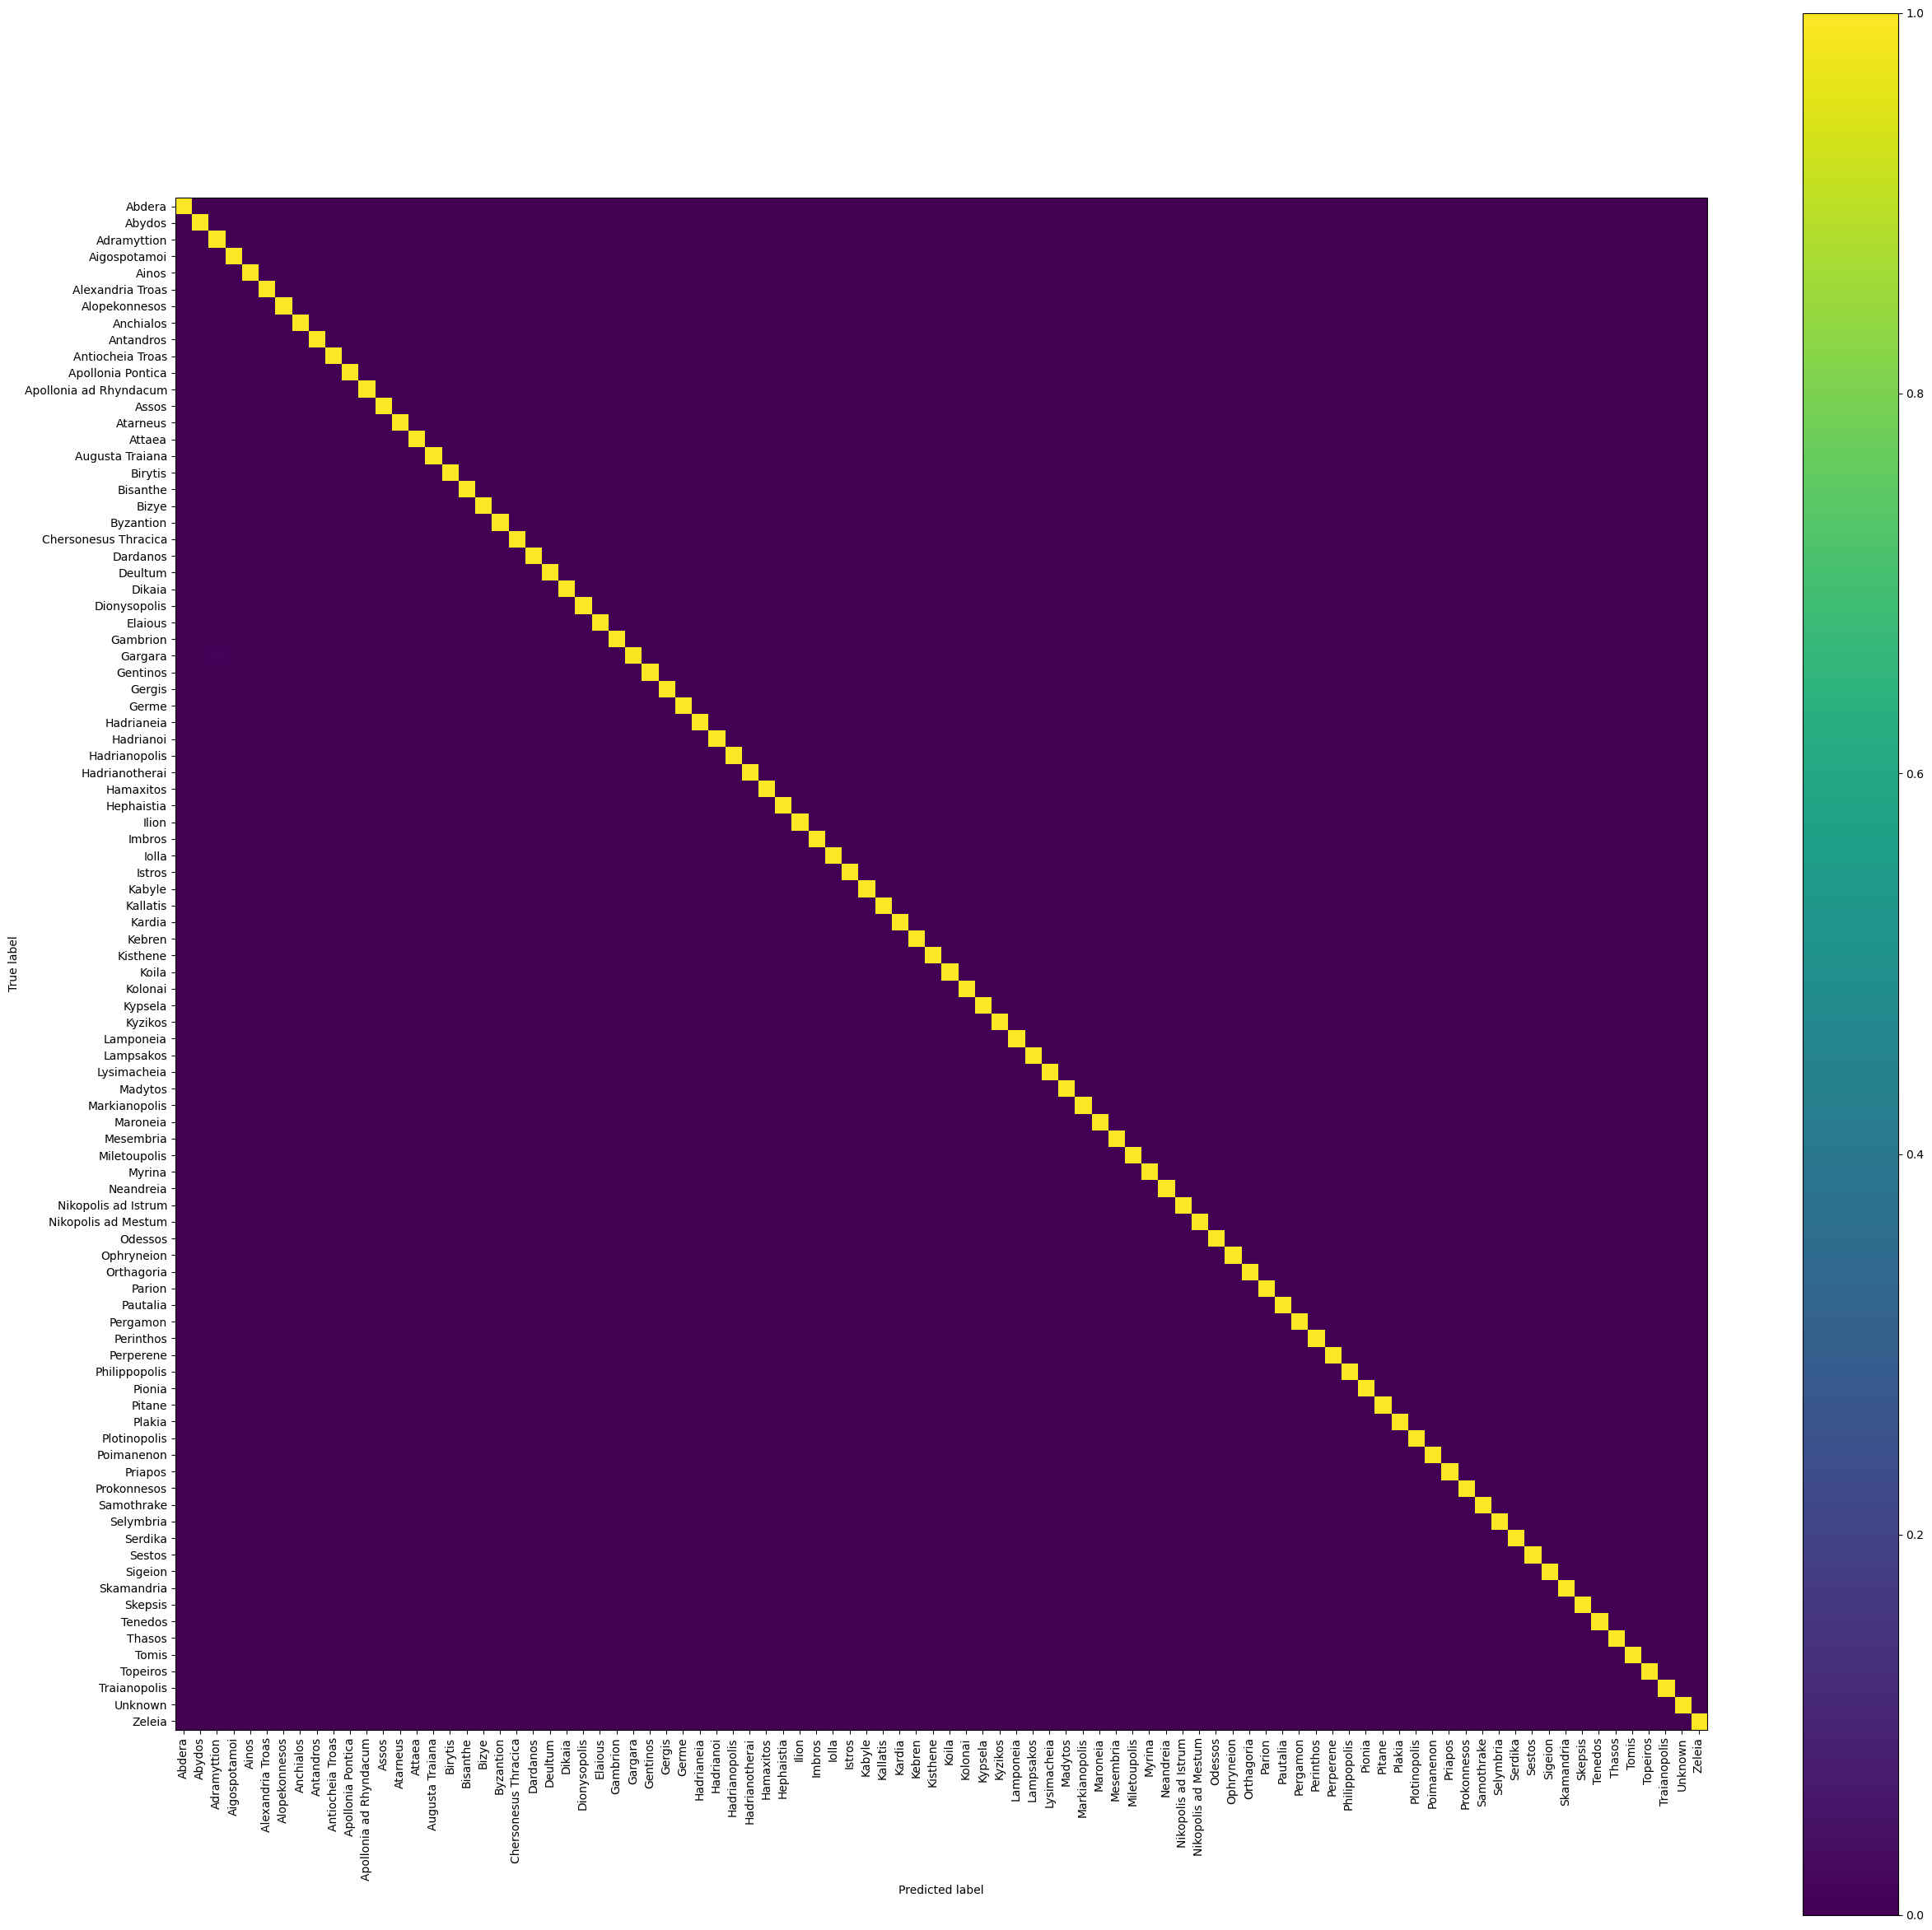

In [22]:
print_score(train_labels_names, test_labels_names, pred_train_meta_RF_labels, pred_test_meta_RF_labels, labels, train=True)

/usr/local/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Test Result:
Accuracy Score: 85.26%
_______________________________________________
CLASSIFICATION REPORT:
               Abdera      Abydos  Adramyttion  Aigospotamoi       Ainos  \
precision    0.950339    0.865979     0.756757      0.400000    0.932489   
recall       0.965596    0.884211     0.575342      1.000000    0.905738   
f1-score     0.957907    0.875000     0.653696      0.571429    0.918919   
support    436.000000  285.000000   146.000000      2.000000  244.000000   

           Alexandria Troas  Alopekonnesos  Anchialos  Antandros  \
precision          0.647059            1.0   0.818182   0.716981   
recall             0.702128            1.0   0.457627   0.716981   
f1-score           0.673469            1.0   0.586957   0.716981   
support           47.000000            2.0  59.000000  53.000000   

           Antiocheia Troas  ...    Tenedos      Thasos      Tomis  Topeiros  \
precision          0.769231  ...   0.902439    0.903333   0.285714       0.0   
recall     

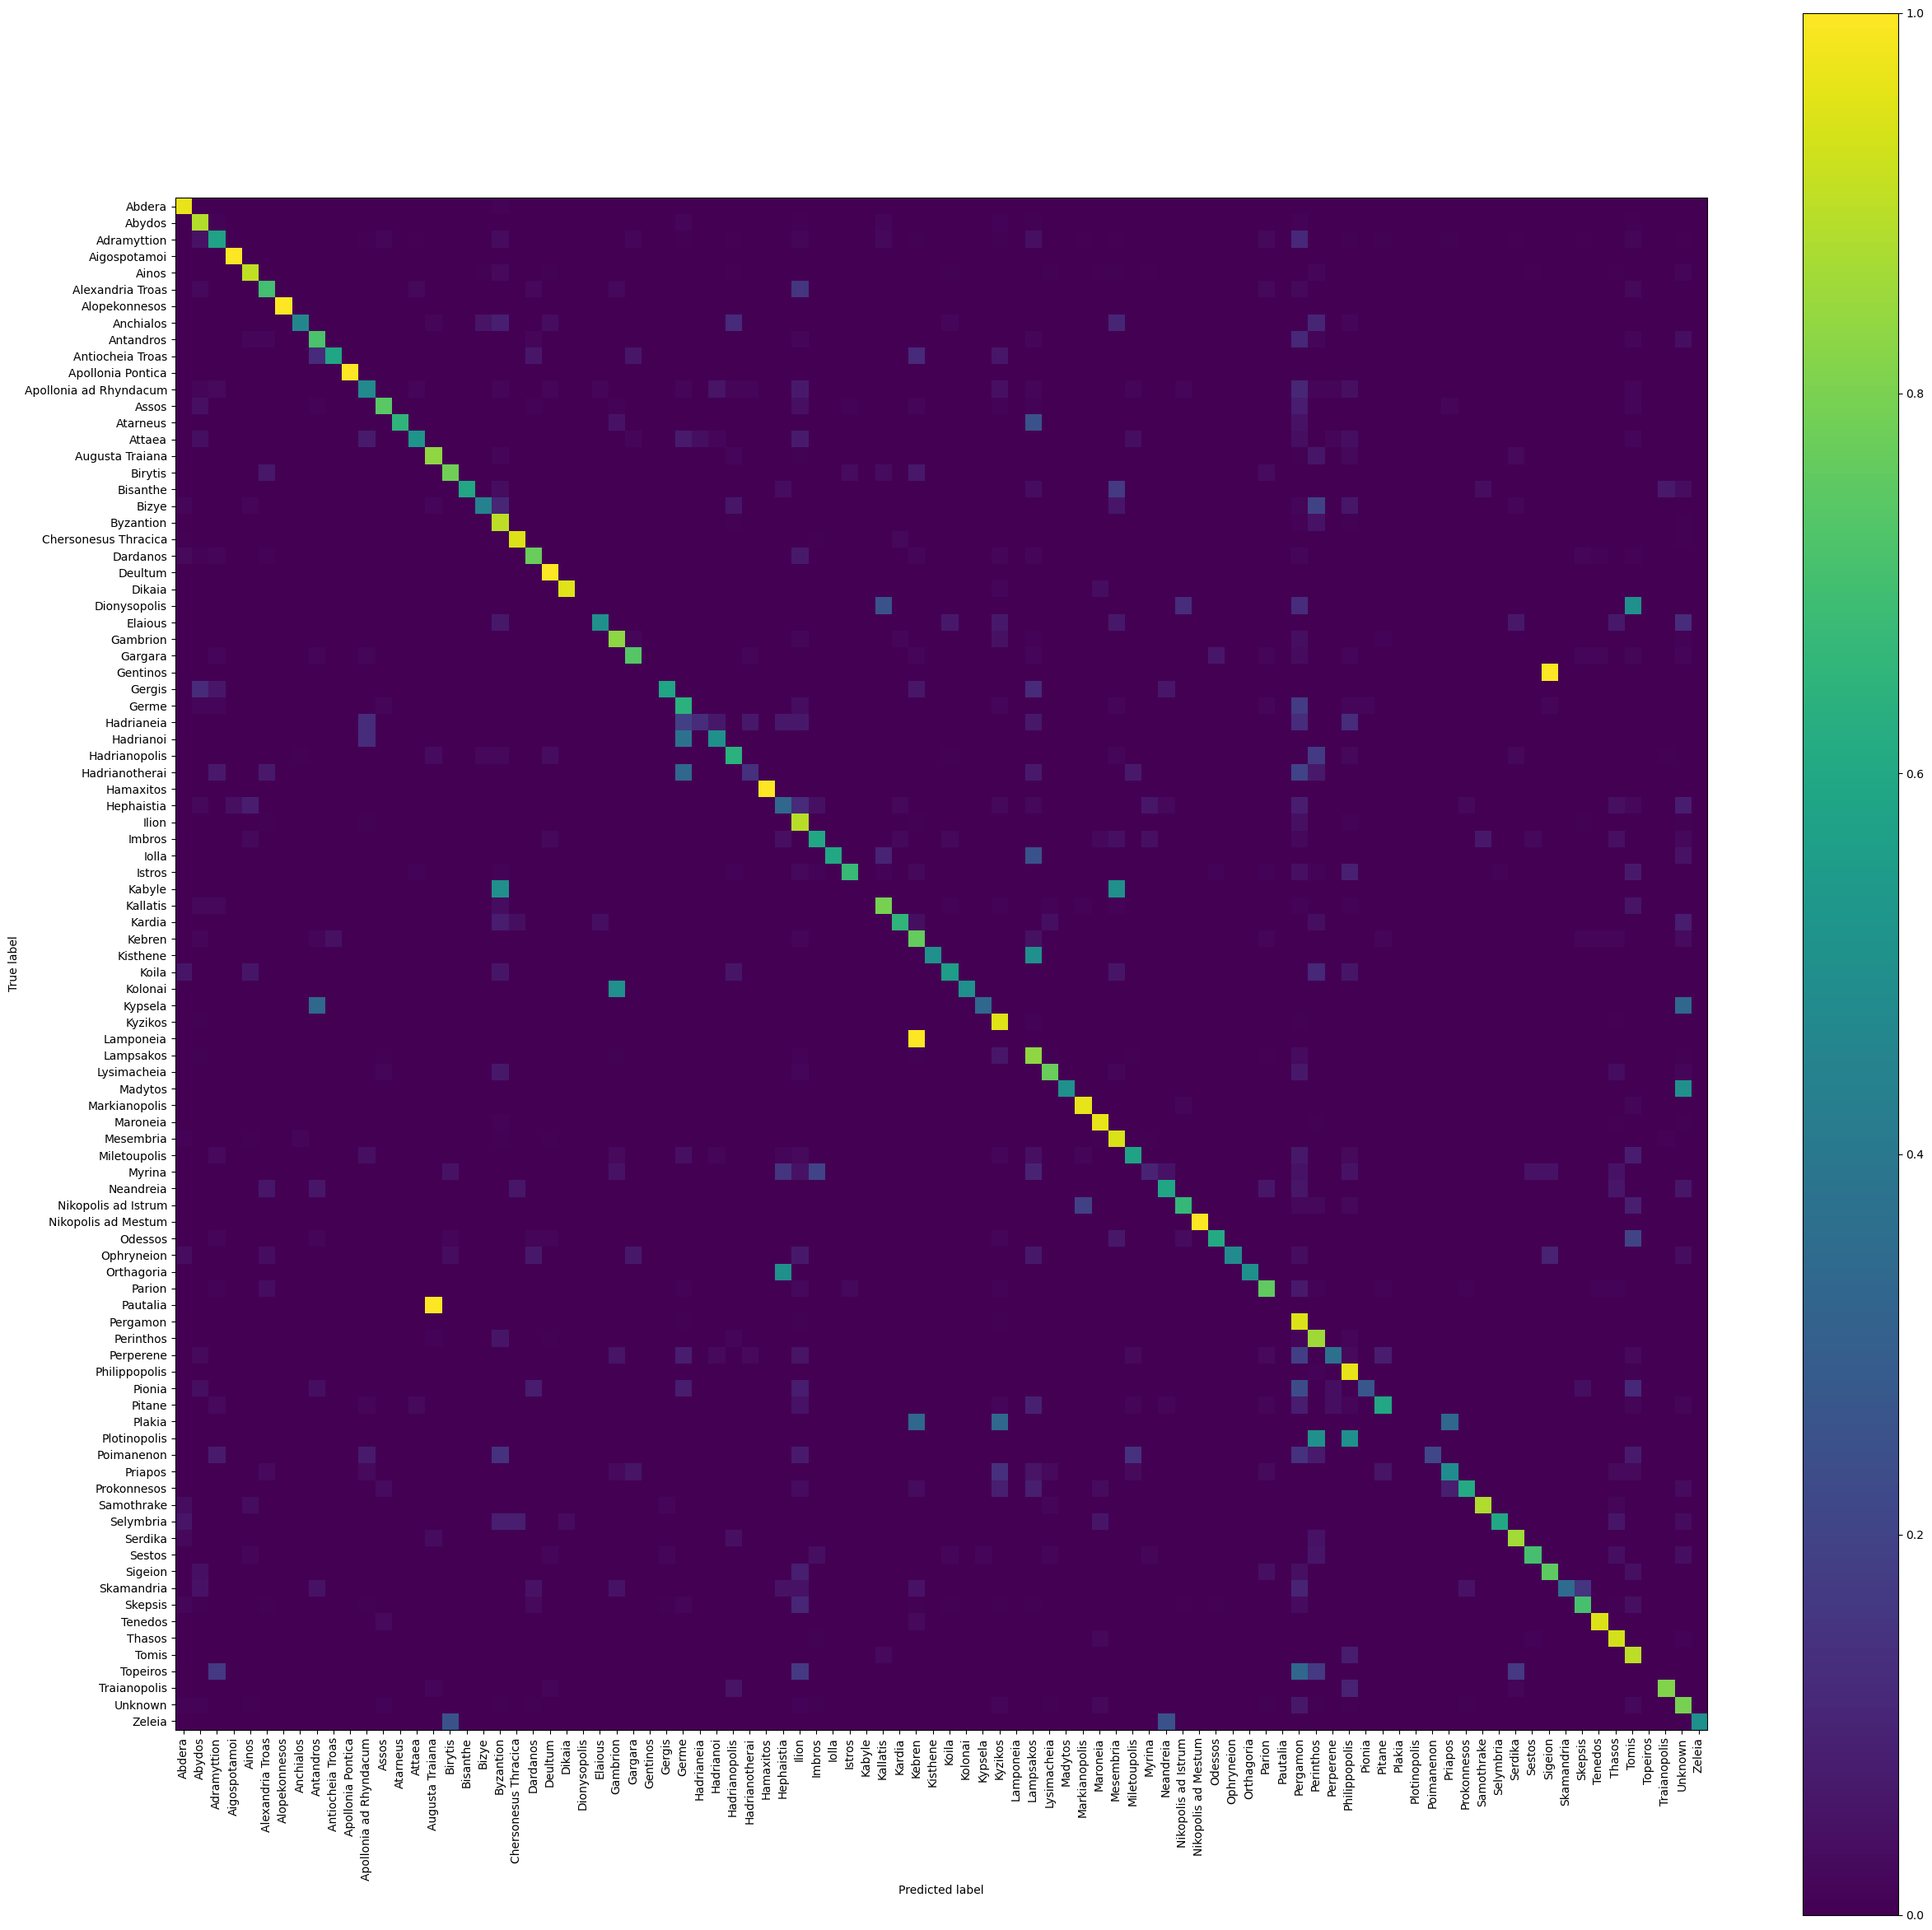

In [23]:
print_score(train_labels_names, test_labels_names, pred_train_meta_RF_labels, pred_test_meta_RF_labels, labels, train=False)

## Wrong predictions

In [24]:
# Predictions for the test set
pred = pred_test_meta_RF_labels.tolist()
print(len(pred), type(pred), pred)

11856 <class 'list'> ['Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera'

In [25]:
# Correct class
actual = test_labels_names.tolist()
print(len(actual), type(actual), actual)

11856 <class 'list'> ['Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera'

In [27]:
# Filenames from the testset
fileName = np.load("/Users/eg/Desktop/DC/Coins/testset_fileNames.npy").tolist()
print(len(fileName), type(fileName), fileName)

11856 <class 'list'> ['CN_type_4402_MK_18247104_cn_coin_5903_o.jpg', 'CN_type_4427_BNF_M 4534_cn_coin_10911_o.jpg', 'CN_type_4428_MK_18247107_cn_coin_5906_o.jpg', 'CN_type_4431_MK_18232882_cn_coin_5586_o.jpg', 'CN_type_4454_cn_coin_21225_p.jpg', 'CN_type_4461_MK_18203121_cn_coin_3122_o.jpg', 'CN_type_4465_cn_coin_21235_p.jpg', 'CN_type_4476_cn_coin_21238_p.jpg', 'CN_type_4503_MK_18237368_cn_coin_5618_o.jpg', 'CN_type_4505_MK_18237349_cn_coin_5617_o.jpg', 'CN_type_4510_cn_coin_21357_p.jpg', 'CN_type_4512_cn_coin_21360_p.jpg', 'CN_type_4623_MK_18237513_cn_coin_6419_o.jpg', 'CN_type_4632_cn_coin_21372_p.jpg', 'CN_type_4632_cn_coin_21373_p.jpg', 'CN_type_4632_cn_coin_21410_p.jpg', 'CN_type_4635_cn_coin_21379_p.jpg', 'CN_type_4637_MK_18237456_cn_coin_6412_o.jpg', 'CN_type_4639_MK_18237901_cn_coin_6421_o.jpg', 'CN_type_4640_cn_coin_21382_p.jpg', 'CN_type_4640_cn_coin_21384_p.jpg', 'CN_type_4647_BNF_Platzhalter_cn_coin_10915_o.jpg', 'CN_type_4647_MK_18237497_cn_coin_6417_o.jpg', 'CN_type_4647

In [28]:
# Create dictionary:
data = {
    'Groundtruth': [],
    'PredictedClass': [],
    'FileName': []
}

In [29]:
for i in range(len(pred)):
    if pred[i] != actual[i]:
        data['Groundtruth'].append(actual[i])
        data['PredictedClass'].append(pred[i])
        data['FileName'].append(fileName[i])
print(data)

{'Groundtruth': ['Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abdera', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Abydos', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyttion', 'Adramyt

In [30]:
import csv

data = data

csv_file_path = 'prediction_data_RF.csv'

# Extract the keys from the dictionary as field names
field_names = list(data.keys())

# Extract the values from the dictionary as rows
rows = zip(*data.values())

# Write the dictionary data to a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write the header row
    writer.writerow(field_names)

    # Write the data rows
    writer.writerows(rows)

print("CSV file created successfully.")

CSV file created successfully.


## Save and Load the Meta-Model

In [ ]:
import joblib

# save
joblib.dump(meta_model_RF, "MetaModel_RF.joblib")

# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("MetaModel_RF.joblib")